In [1]:
# import pandas module 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# making dataframe 
answers_df = pd.read_csv("./Answers.csv", encoding = "ISO-8859-1") 
questions_df = pd.read_csv("./Questions.csv", encoding = "ISO-8859-1")
tags_df = pd.read_csv("./Tags.csv", encoding = "ISO-8859-1")

In [3]:
answers_df.head(5)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...
3,538,156.0,2008-08-02T18:56:56Z,535,23,<p>One possibility is Hudson. It's written in...
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">B..."


In [4]:
questions_df.head(5)

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...


In [5]:
# utility function, to just get the slice of the answers_df which matches the question ID
def get_answers_by_question_id(question_id):
    portion = answers_df.query(f"ParentId == {question_id}")
    return portion

In [6]:
# initial EDA, data cleaning
# 1) look at distribution of scores on the answers
# --- join to questions ---
# distribution of max answer score for each question
# distribution of # responses per question

In [7]:
scores = answers_df['Score']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e3b57f040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e3b57f6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e3bd6ecd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e3b57fb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e3b57fe50>],
 'means': []}

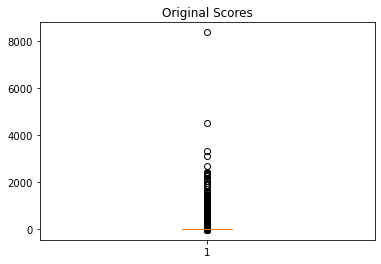

In [8]:
# an initial look at the scores makes it clear that there are some very extreme values...
fig1, ax1 = plt.subplots()
ax1.set_title('Original Scores')
ax1.boxplot(scores)

In [9]:
# median is 1, 75% is 3, but the max is 8384. let's see where it all goes wrong
scores.describe()

count    987122.000000
mean          3.028437
std          21.263246
min         -38.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        8384.000000
Name: Score, dtype: float64

In [10]:
# using the IQR method to remove outliers
# https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce

In [11]:
IQR = scores.quantile(0.75) - scores.quantile(0.25)
print(IQR)

3.0


In [12]:
scores_upper_limit = scores.quantile(0.75) + 3 * IQR
scores_lower_limit = scores.quantile(0.25) - 3 * IQR

In [13]:
# using these limits, filter the answers_df
answers_df_filtered = answers_df[(answers_df['Score'] < scores_upper_limit) & (answers_df['Score'] > scores_lower_limit)]

In [14]:
# see how many rows we removed by this process
rows_removed = len(answers_df) - len(answers_df_filtered)
percentage_removed = 100 * rows_removed / len(answers_df)
print(f'removed {rows_removed} rows, which is {round(percentage_removed, 2)}% of the original answers dataset')

removed 35552 rows, which is 3.6% of the original answers dataset


In [15]:
scores_filtered = answers_df_filtered['Score']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e3b47a730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e3b47abb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e3b47a460>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e3b48a190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e3b48a460>],
 'means': []}

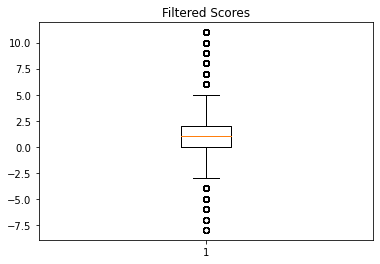

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('Filtered Scores')
ax1.boxplot(scores_filtered)

array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

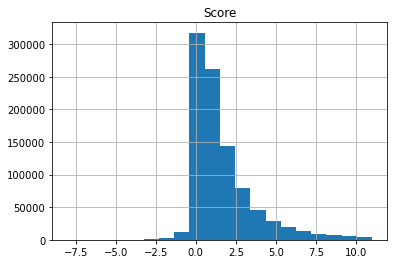

In [17]:
# Histogram view of the general distribution of the Score trait, among the answers
answers_df_filtered.hist(column="Score", bins=20)